In this notebook, we will learn how to perform k-means lustering using scikit-learn in Python. 

We will use cluster analysis to generate a big picture model of the weather at a local station using a minute-graunlarity data. In this dataset, we have in the order of millions records. How do we create 12 clusters our of them?

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('./data/minute_weather.csv')

In [3]:
data.head(10)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Minute Weather Data Description</p>
<br>
 **minute 天气数据集** 包含以一分钟为间隔捕获的原始传感器测量值. 相反，每日天气数据集包含经过处理和精心策划的数据。minute_weather.csv文件中，该文件是逗号分隔的文件。
与每日天气数据一样，此数据来自加利福尼亚州圣地亚哥的气象站。气象站配备有传感器，可捕获与天气有关的测量值，例如气温，气压和相对湿度。收集了从2011年9月到2014年9月这三年的数据，以确保捕获到不同季节和天气条件的足够数据。

**minute_weather.csv** 每一行都包含一分钟间隔内捕获的天气数据。每行或样本均包含以下变量:

* **rowID:** 	行ID	(*Unit: NA*)
* **hpwren_timestamp:**	测量时间戳	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** 气压	(*Unit: hectopascals*)
* **air_temp:**	空气温度	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	时间戳前一分钟的平均风向	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	时间戳前一分钟的平均风速	(*Unit: meters per second*)
* **max_wind_direction:**	时间戳前一分钟的最高风向	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	时间戳前一分钟的最高风速	(*Unit: meters per second*)
* **min_wind_direction:**	时间戳前一分钟的最小风向	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	时间戳前一分钟的最小风速	(*Unit: meters per second*)
* **rain_accumulation:**	在时间戳上测量的累积雨量	(*Unit: millimeters*)
* **rain_duration:**	时间戳上雨量减少的时间长度	(*Unit: seconds*)
* **relative_humidity:**	在时间戳上测量的相对湿度	(*Unit: percent*)

In [4]:
data.shape

(1587257, 13)

资料取样

行数很多，因此让我们通过每隔10行采样一下。

In [5]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [6]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [7]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [8]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [9]:
#删除下面两列
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [11]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4


In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [13]:
#多少行被删除
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [15]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [16]:
select_df = sampled_df[features]
select_df.head(10)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


In [17]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [18]:
kmeans = KMeans(n_clusters=12)  #12类
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [20]:
#12个类别的中心
centers = model.cluster_centers_
centers

array([[-0.83949097, -1.19874436,  0.37601302,  0.38428234,  0.47434757,
         0.37178841,  1.35788963],
       [-0.15506233,  0.86000989, -1.31022695, -0.59043365, -1.16573539,
        -0.60581276, -0.6452328 ],
       [-0.67835371,  0.5660759 ,  0.17924935, -0.58750316,  0.34924125,
        -0.60095247, -0.13297011],
       [ 0.22050101, -0.99788665,  0.65270979, -0.54778082,  0.8417159 ,
        -0.5307806 ,  1.17113086],
       [ 1.18805244, -0.25609525, -1.15520856,  2.1380778 , -1.05370759,
         2.25576912, -1.13484202],
       [ 0.12831184,  0.84959492,  1.40864551, -0.63820156,  1.67268061,
        -0.58908859, -0.71369129],
       [-1.18358487, -0.86689873,  0.44703562,  1.98752891,  0.53815544,
         1.94824127,  0.90525032],
       [ 0.23400447,  0.32029924,  1.88791785, -0.65187638, -1.55171392,
        -0.57673806, -0.28388023],
       [-0.21387042,  0.63505779,  0.40821735,  0.73361627,  0.5163073 ,
         0.67162254, -0.15075016],
       [ 1.37380211, -0.0855

In [24]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [22]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [23]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.839491,-1.198744,0.376013,0.384282,0.474348,0.371788,1.357890,0
1,-0.155062,0.860010,-1.310227,-0.590434,-1.165735,-0.605813,-0.645233,1
2,-0.678354,0.566076,0.179249,-0.587503,0.349241,-0.600952,-0.132970,2
3,0.220501,-0.997887,0.652710,-0.547781,0.841716,-0.530781,1.171131,3
4,1.188052,-0.256095,-1.155209,2.138078,-1.053708,2.255769,-1.134842,4
5,0.128312,0.849595,1.408646,-0.638202,1.672681,-0.589089,-0.713691,5
6,-1.183585,-0.866899,0.447036,1.987529,0.538155,1.948241,0.905250,6
7,0.234004,0.320299,1.887918,-0.651876,-1.551714,-0.576738,-0.283880,7
8,-0.213870,0.635058,0.408217,0.733616,0.516307,0.671623,-0.150750,8
9,1.373802,-0.085599,-1.206243,-0.032321,-1.075388,-0.010920,-0.979614,9


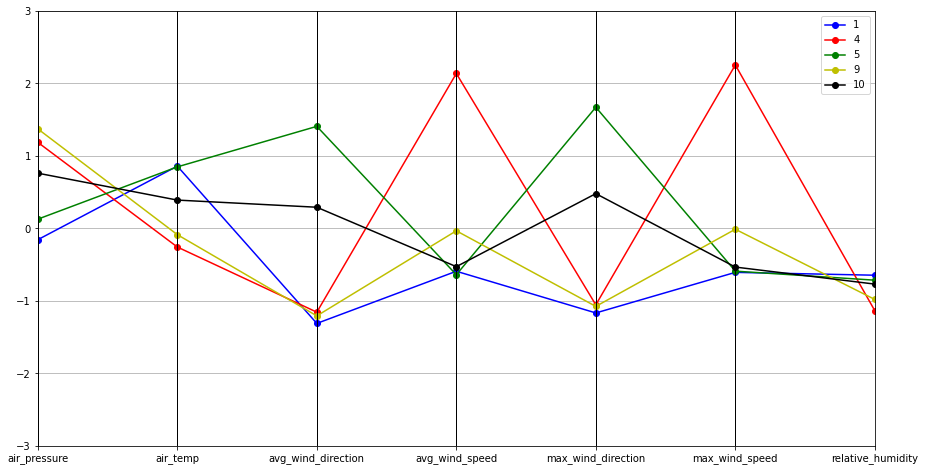

In [25]:
#干旱天，看相对湿度
parallel_plot(P[P['relative_humidity'] < -0.5])

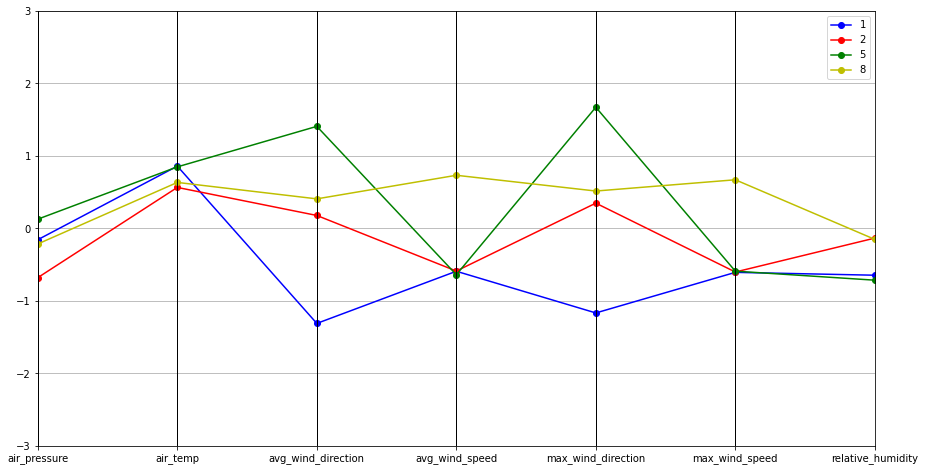

In [27]:
#暖和天气，空气温度
parallel_plot(P[P['air_temp'] > 0.5])

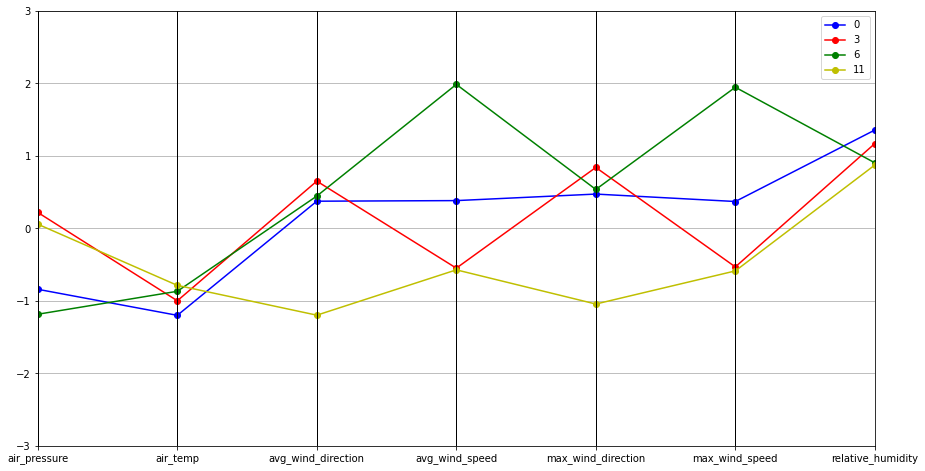

In [28]:
#冷天，相对湿度>0.5 and 空气温度<0.5
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])

In [29]:
#查看每个样本的聚类类别
predict_y = kmeans.predict(X)
predict_y[0:10]

array([ 2,  2,  2,  2,  2,  2,  2,  2, 11, 11])